In [1]:
#25\07\24
import numpy as np #linear algebra
import pandas as pd #data processing,CSV file I/O(eg.pd.read_csv

In [5]:
df=pd.read_csv("Churn_Modelling.csv")

In [18]:
df.shape
#Total 10 K data points and 14 columns

(10000, 14)

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
#RowNumber,CustomerId,Surname not useful hence dropped

In [26]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df.isnull()
#no null value

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [32]:
df.info()
#we get the data types
#Geography and Gender are of object type we have to convert it into numericform

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [38]:
df.duplicated().sum()

0

In [40]:
#let us check how many customers have left the bank
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [44]:
#let us check how many customers are from which Geography
df['Geography'].value_counts()
#less customers are less from spain,and more from france

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [46]:
#let us check how many males and how many females are there
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [50]:
#we want to convert GEography and Gender which is an object type convert into integer
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [52]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [54]:
#here Geography france is dropped and Gender female column is dropped

In [56]:
#Assign all features to x and target column as y
#Divide the data into train and test

In [118]:
X=df.drop(columns=['Exited'])
y=df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [120]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [70]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [122]:
X_train.shape

(8000, 11)

In [124]:
#Let us make uniform scaling of all features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.transform(X_test)

In [78]:
#Now let us define Artificial Neural Network(ANN model)

In [82]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [110]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [90]:
#11 features 3 input links->11x3=33 +3 biased +3 output layer + 1 output biased==40 parameters

In [112]:
model.compile(optimizer='Adam',loss='binary_crossentropy')

In [126]:
history=model.fit(X_train_trf,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4292
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4350
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4220
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4244
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4254
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4377
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4234
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4177
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4105
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4288


In [116]:
#now let us check final weights after training
model.layers[0].get_weights()

[array([[-0.00523503,  0.33951765,  0.07187054],
        [-1.1511672 , -0.96802074, -1.8211331 ],
        [ 0.19904383,  0.12492768,  0.02133739],
        [ 0.13655703, -0.68850505, -0.28942457],
        [ 0.6527858 , -0.2751984 ,  0.0970418 ],
        [ 0.03964076,  0.15156509, -0.13270555],
        [ 0.84859264,  0.638268  ,  0.38975888],
        [-0.08584462,  0.03911773, -0.14831407],
        [-0.6810583 , -0.7875388 , -0.49719325],
        [-0.02349632, -0.47803336,  0.1402649 ],
        [ 0.48864177,  0.31204194,  0.5574448 ]], dtype=float32),
 array([0.42570004, 0.1715274 , 0.14086942], dtype=float32)]

In [128]:
model.layers[1].get_weights()

[array([[-1.3552547],
        [-0.7950415],
        [-1.347162 ]], dtype=float32),
 array([0.30911833], dtype=float32)]

In [130]:
y_log=model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [136]:
y_log#the result produce is in form of probability we need to convert it into 0 and 1

array([[0.25144276],
       [0.36561507],
       [0.17689706],
       ...,
       [0.13418524],
       [0.11945507],
       [0.19669051]], dtype=float32)

In [138]:
#the result produce is in form of probability we need to convert it into 0 and 1
#if the output is less than 0.5 then output 0 means customer ill leave the bank
#if output greater than 0.5 then 1 means customer will retain the bank.

In [140]:
y_pred=np.where(y_log>0.5,1,0)

In [142]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8165

In [146]:
#let us increase tne number of nodes and layers also

In [148]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [150]:
#11x11+11 bias,11x11+11 bias,11x1+1=276

In [152]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [158]:
history=model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6720 - loss: 0.6125 - val_accuracy: 0.7944 - val_loss: 0.4789
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8100 - loss: 0.4539 - val_accuracy: 0.8031 - val_loss: 0.4492
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8278 - loss: 0.4141 - val_accuracy: 0.8144 - val_loss: 0.4401
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8205 - loss: 0.4246 - val_accuracy: 0.8169 - val_loss: 0.4339
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8200 - loss: 0.4176 - val_accuracy: 0.8206 - val_loss: 0.4287
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8293 - loss: 0.4084 - val_accuracy: 0.8219 - val_loss: 0.4238
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8302 - loss: 0.4066 - val_accuracy: 0.8238 - val_loss: 0.4187
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8276 - loss: 0.4036 - val_accu

In [160]:
y_log=model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [162]:
y_log

array([[0.2967486 ],
       [0.33513328],
       [0.16070859],
       ...,
       [0.07597489],
       [0.2642482 ],
       [0.2137535 ]], dtype=float32)

In [164]:
y_pred=np.where(y_log>0.5,1,0)

In [166]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [168]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8535

In [170]:
history.history

{'accuracy': [0.7490624785423279,
  0.8062499761581421,
  0.8168749809265137,
  0.8221874833106995,
  0.8212500214576721,
  0.8271874785423279,
  0.8306249976158142,
  0.8314062356948853,
  0.839062511920929,
  0.8426562547683716,
  0.8470312356948853,
  0.850781261920929,
  0.8542187213897705,
  0.8567187786102295,
  0.8598437309265137,
  0.860156238079071,
  0.8600000143051147,
  0.8620312213897705,
  0.8609374761581421,
  0.8621875047683716,
  0.862500011920929,
  0.8631250262260437,
  0.8620312213897705,
  0.8628125190734863,
  0.8623437285423279,
  0.8634374737739563,
  0.8629687428474426,
  0.8634374737739563,
  0.8662499785423279,
  0.864062488079071,
  0.8637499809265137,
  0.8651562333106995,
  0.8642187714576721,
  0.8626562356948853,
  0.8653125166893005,
  0.8643749952316284,
  0.862500011920929,
  0.8643749952316284,
  0.8665624856948853,
  0.8659374713897705,
  0.8639062643051147,
  0.8637499809265137,
  0.8650000095367432,
  0.8643749952316284,
  0.866406261920929,
  0.8

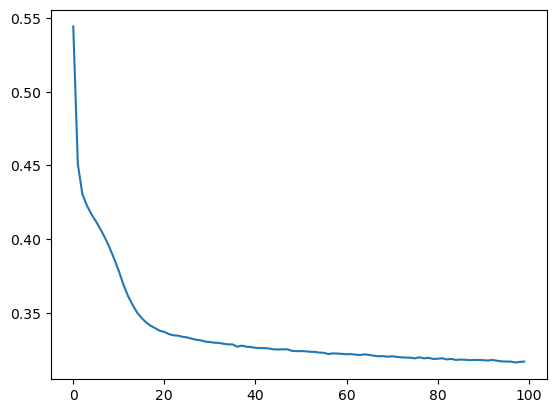

In [172]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

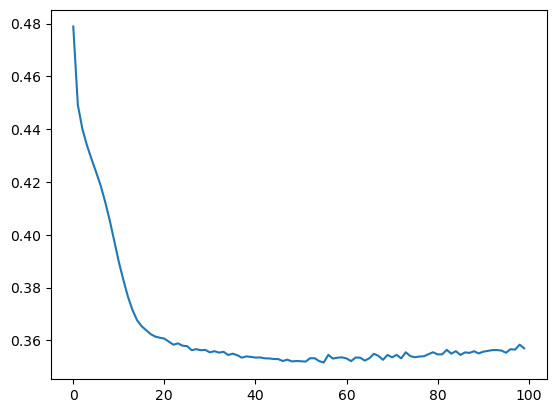

In [174]:
plt.plot(history.history['val_loss'])

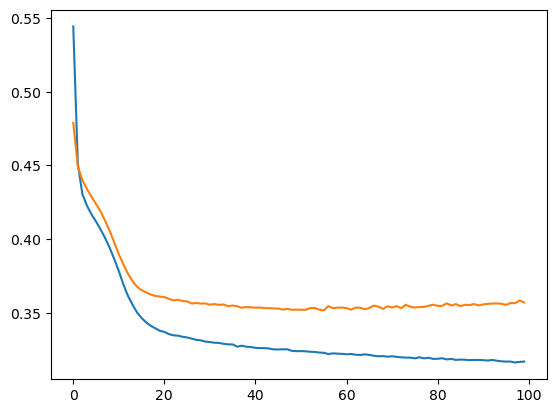

In [176]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [178]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from IPython import display